<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week02-LR/Lab1-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Normal equation**

theta =  [0.57142857 0.85714286]
y predict =  [0.57142857 9.14285714]


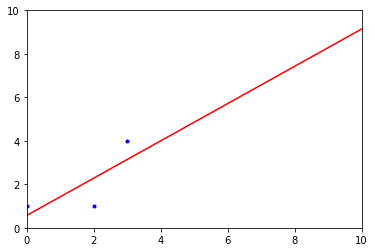

In [27]:
import numpy as np
x = np.array([0,2,3])
y = np.array([1,1,4])
x_b = np.c_[np.ones((3,1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[0],[10]])
x_n_b = np.c_[np.ones((2,1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n, y_p,"r-")
plt.plot(x,y, "b.")
plt.axis([0,10,0,10])
plt.show()


**Sklearn**

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression 
x = np.array([[0,2,3]]).T
y = np.array([1,1,4])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)
x_n = np.array([[3]]).T
ans = lin_reg.predict(x_n)
print(ans)


0.5714285714285712  ,  [0.85714286]
[3.14285714]


**Gradient descent**


In [29]:
lossDict1 = {}
lossDict2 = {}

x.shape = (3, 1) y.shape = (3,)
<class 'list'>   [0.1]
First j =  [2.37666667]
iter =  0
t0 =  [0.27333333]
t1 =  [0.50666667]
error =  [0.91326667]
iter =  1
t0 =  [0.36155556]
t1 =  [0.70822222]
error =  [0.55073641]
iter =  2
t0 =  [0.40736296]
t1 =  [0.80773333]
error =  [0.46083035]
Max interactions exceeded!
theta0 = [0.40736296] theta1 = [0.80773333]
intercept = 0.5714285714285714 slope = 0.8571428571428571


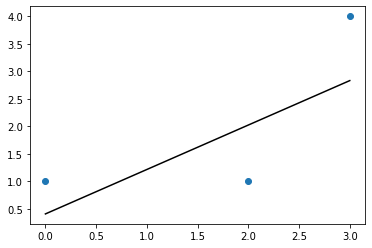

In [35]:
import numpy as np
import random
import sklearn
#from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta0, theta1, x, y, m):

    c = 1/(2*m) * sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
    return c

def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = [0.1] #np.random.random(x.shape[1])
    print(type(t0)," ",t0)
  
    t1 = [0.1] #np.random.random(x.shape[1])

    # total error, J(theta)
    J = cost_function(t0,t1,x,y,m)
    print("First j = ",J)

    lossDict1[t0[0]] = J[0]
    lossDict2[t1[0]] = J[0]

    # Iterate Loop
    while not converged:
        grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * (1/m) * grad0
        temp1 = t1 - alpha * (1/m) * grad1
        # update theta
        t0 = temp0
        t1 = temp1
        print("iter = ",iter)
        print("t0 = ",t0)
        print("t1 = ",t1)
        # error
        e = cost_function(t0,t1,x,y,m)
        print("error = ",e)
        
        #Terminate 1
        if abs(J-e) <= ep:
           print("Converged at ", iter, "/", max_iter)
           converged = True
    
        J = e   # update error s
        iter += 1  # update iter

        lossDict1[t0[0]] = J[0]
        lossDict2[t1[0]] = J[0]
    
        #Termiate 2
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
    x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
    y = np.array([1,1,4])
    print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
    alpha = 0.1 # learning rate

    theta0, theta1 = gradient_descent(alpha, x, y,ep=0.000000001, max_iter=3)
    print (("theta0 = %s theta1 = %s") %(theta0, theta1)) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print (("intercept = %s slope = %s") %(intercept, slope))

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()

#Gradient Descent curve Static VS Dynamic

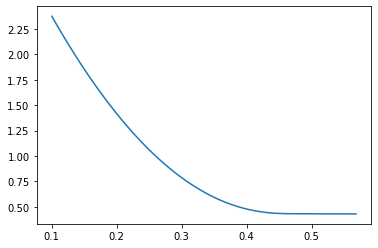

In [31]:
lists = sorted(lossDict1.items()) # sorted by key, return a list of tuples
_x, _y = zip(*lists) # unpack a list of pairs into two tuples
#print(_x)
#print(">>")
#print(_y)
plt.plot(_x, _y)

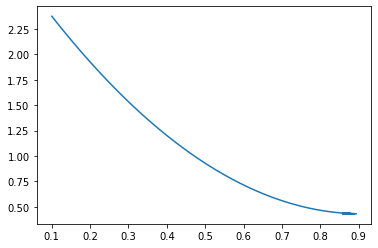

In [32]:
lists2 = sorted(lossDict2.items()) # sorted by key, return a list of tuples
_x2, _y2 = zip(*lists2) # unpack a list of pairs into two tuples
#print(_x2)
#print(",,")
#print( _y2)
plt.plot(_x2, _y2)

In [33]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x)
_y = list(_y)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Gradient Descent Curve",     
        hovermode="closest",
        xaxis_title="Theta0", 
        yaxis_title="Loss value (MSE)",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N-1,0,-5)],
)

fig.show()

In [34]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x2)
_y = list(_y2)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
                
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Gradient Descent Curve", 
        hovermode="closest",
        xaxis_title="Theta1", 
        yaxis_title="Loss value (MSE)",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N-1,0,-5)],
)

fig.show()